In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree,export_text
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data files/BreastCancer.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
x=data.iloc[:,:9].values
y=data.iloc[:,9].values

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
clt=DecisionTreeClassifier()
clt.fit(x_train,y_train)

DecisionTreeClassifier()

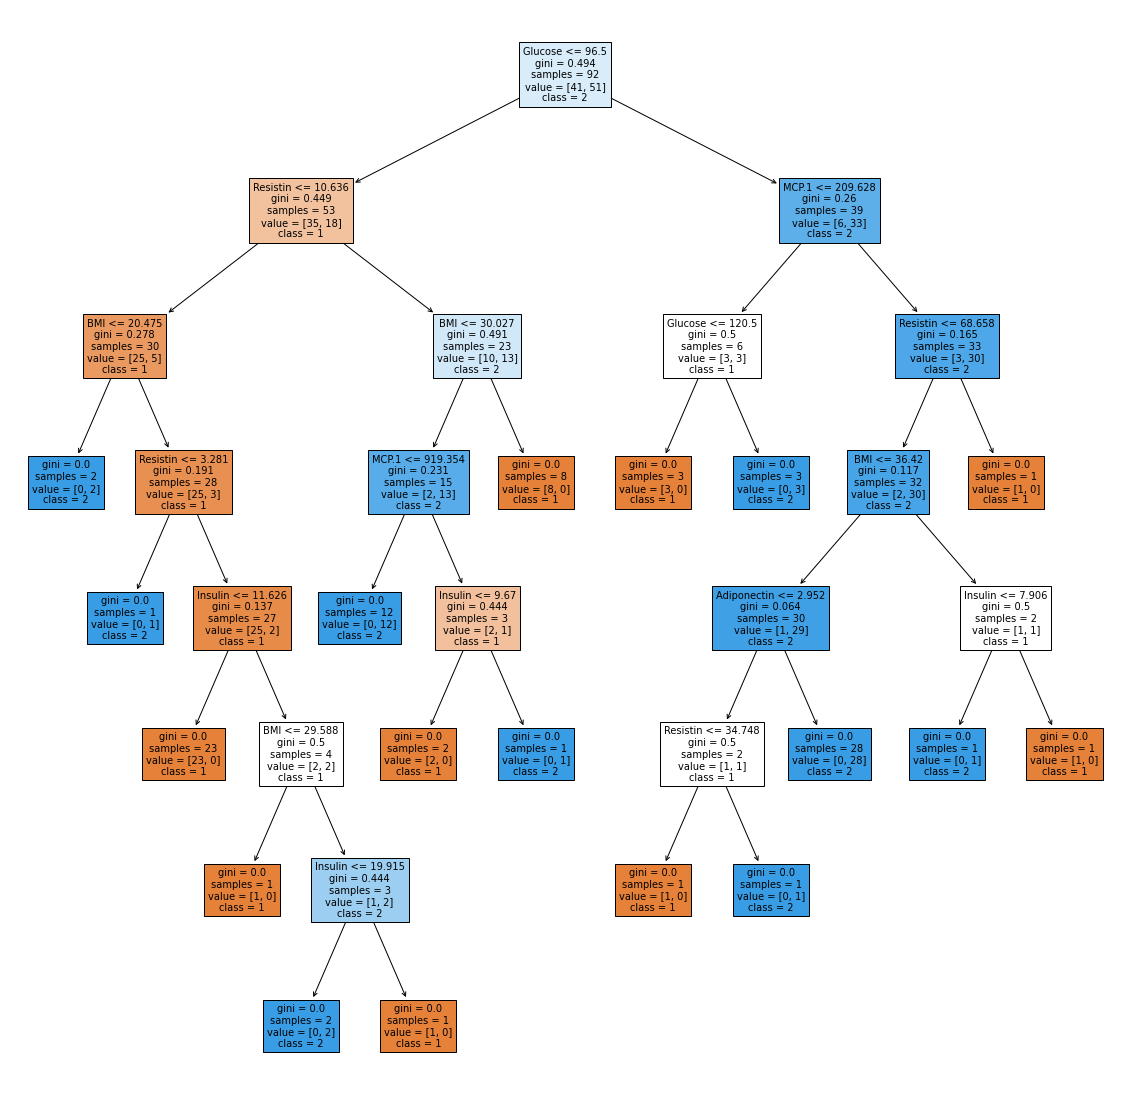

In [7]:
plt.figure(figsize=(20,20))
plot_tree(clt,feature_names=data.columns,class_names=["1","2"],filled=True)
plt.show()

In [8]:
text_representaion=export_text(clt)
print(text_representaion)

|--- feature_2 <= 96.50
|   |--- feature_7 <= 10.64
|   |   |--- feature_1 <= 20.48
|   |   |   |--- class: 2
|   |   |--- feature_1 >  20.48
|   |   |   |--- feature_7 <= 3.28
|   |   |   |   |--- class: 2
|   |   |   |--- feature_7 >  3.28
|   |   |   |   |--- feature_3 <= 11.63
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  11.63
|   |   |   |   |   |--- feature_1 <= 29.59
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  29.59
|   |   |   |   |   |   |--- feature_3 <= 19.91
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_3 >  19.91
|   |   |   |   |   |   |   |--- class: 1
|   |--- feature_7 >  10.64
|   |   |--- feature_1 <= 30.03
|   |   |   |--- feature_8 <= 919.35
|   |   |   |   |--- class: 2
|   |   |   |--- feature_8 >  919.35
|   |   |   |   |--- feature_3 <= 9.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  9.67
|   |   |   |   |   |--- class: 2
|   |   |--- feature_1 >  30

In [9]:
y_pred=clt.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[6, 5],
       [6, 7]])

In [10]:
accuracy_score(y_test,y_pred)

0.5416666666666666

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.55      0.52        11
           2       0.58      0.54      0.56        13

    accuracy                           0.54        24
   macro avg       0.54      0.54      0.54        24
weighted avg       0.55      0.54      0.54        24



In [13]:
clt=DecisionTreeClassifier(max_depth=3)
clt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

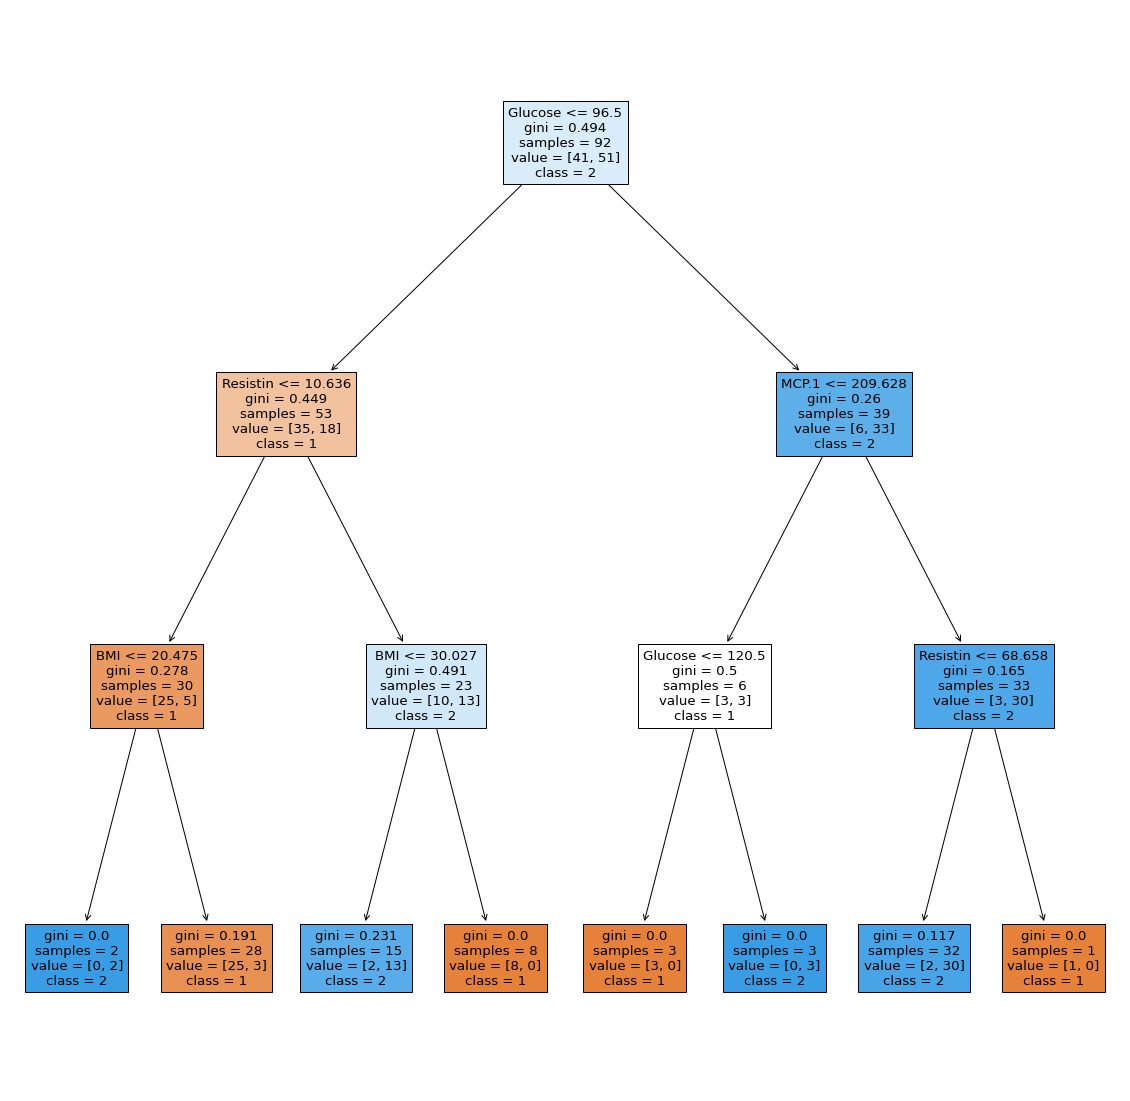

In [16]:
plt.figure(figsize=(20,20))
plot_tree(clt,feature_names=data.columns,class_names=["1","2"],filled=True)
plt.show()

In [17]:
y_pred=clt.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[6, 5],
       [5, 8]])

In [18]:
accuracy_score(y_test,y_pred)

0.5833333333333334

In [19]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Boston.csv")
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
x=data.iloc[:,:12].values
y=data.iloc[:,12].values

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
rgt=DecisionTreeRegressor(max_depth=4)
rgt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [24]:
DecisionTreeRegressor(max_depth=4)

DecisionTreeRegressor(max_depth=4)

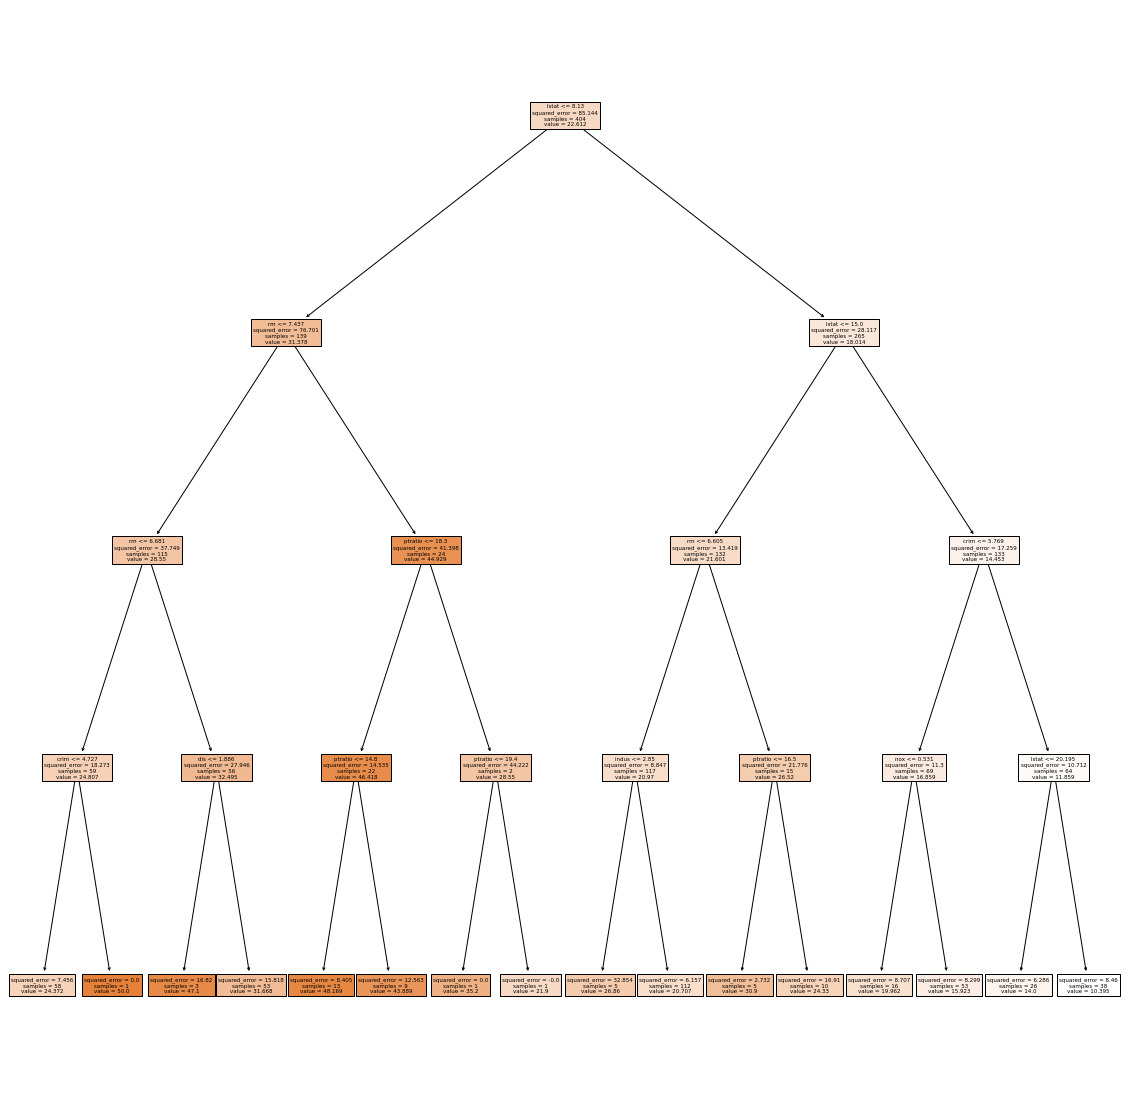

In [25]:
plt.figure(figsize=(20,20))
plot_tree(rgt,feature_names=data.columns,filled=True)
plt.show()

In [26]:
text_representaion=export_text(rgt)
print(text_representaion)

|--- feature_11 <= 8.13
|   |--- feature_4 <= 7.44
|   |   |--- feature_4 <= 6.68
|   |   |   |--- feature_0 <= 4.73
|   |   |   |   |--- value: [24.37]
|   |   |   |--- feature_0 >  4.73
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_4 >  6.68
|   |   |   |--- feature_6 <= 1.89
|   |   |   |   |--- value: [47.10]
|   |   |   |--- feature_6 >  1.89
|   |   |   |   |--- value: [31.67]
|   |--- feature_4 >  7.44
|   |   |--- feature_9 <= 18.30
|   |   |   |--- feature_9 <= 14.80
|   |   |   |   |--- value: [48.17]
|   |   |   |--- feature_9 >  14.80
|   |   |   |   |--- value: [43.89]
|   |   |--- feature_9 >  18.30
|   |   |   |--- feature_9 <= 19.40
|   |   |   |   |--- value: [35.20]
|   |   |   |--- feature_9 >  19.40
|   |   |   |   |--- value: [21.90]
|--- feature_11 >  8.13
|   |--- feature_11 <= 15.00
|   |   |--- feature_4 <= 6.60
|   |   |   |--- feature_2 <= 2.85
|   |   |   |   |--- value: [26.86]
|   |   |   |--- feature_2 >  2.85
|   |   |   |   |--- value: [20.71